### **勾配降下法（Gradient Descent）**

勾配降下法は、関数の最小値を見つけるための方法で、1次微分係数を利用して関数の勾配に沿って最適な値を探す反復アルゴリズムです。この方法は、非線形関数や複雑な関数で、微分係数とその解を直接計算するのが難しい場合でも有効です。

#### **勾配降下法の直感的な意味**
勾配降下法は、関数の値が最も速く低くなる方向に移動し、最終的に関数の最小値を見つける方法です。この方法は、霧に覆われた山を下るときに、山の最も低い方向に足を踏み出しながら降りる過程に例えられます。

#### **勾配降下法の目的と使用理由**
1. **複雑な関数の最小値探索**：勾配降下法は、関数の勾配を利用して最小値を探す方法なので、閉じた形でない関数や非線形関数など、微分係数を直接計算するのが難しい場合にも適用できます。
2. **コンピュータ実装の容易さ**：微分係数を計算する代わりに、比較的簡単な方法で関数の勾配を利用して最小値を見つけることができるため、コンピュータで容易に実装できます。
3. **効率的な計算**：データ量が非常に大きい場合、勾配降下法のような反復的な方法を使うことで、計算量を減らし、効率的に解を見つけることができます。

#### **勾配降下法の数式の導出**
勾配降下法は、関数の勾配（Gradient）を利用して、変数 $x$ の値をどこに移動させれば関数が最小値に到達するかを判断する方法です。

1. **勾配の符号と移動方向**:
   - 勾配が正のとき： $x$ の値を負の方向に移動すると関数の値が減少します。
   - 勾配が負のとき： $x$ の値を正の方向に移動すると関数の値が減少します。

2. **移動距離の決定**:
   - 移動距離は、勾配の大きさに比例して決まります。関数の最小値に近づくほど勾配の値が小さくなるため、移動距離を徐々に小さくしながら最小値にアプローチできます。
   - 移動距離の調整因子は通常ステップサイズ（step size）と呼ばれ、記号 $\alpha$ で表されます。

3. **最終的な数式**:
   - 最適化したい関数 $ f(x) $ に対して、勾配降下法の数式は以下のようになります：

     $$
     x_{i+1} = x_i - \alpha \frac{df}{dx}(x_i) \tag{1}
     $$

   - この数式を多変数関数に拡張すると：

     $$
     x_{i+1} = x_i - \alpha \nabla f(x_i) \tag{2}
     $$

#### **適切なステップサイズの選択**
- **大きなステップサイズ**：移動距離が大きいため、速く収束する可能性がありますが、最小値を通り越してしまったり、発散する危険性があります。
- **小さなステップサイズ**：ゆっくり収束して安定的ですが、最適な値を見つけるのに時間がかかります。
- **適切なステップサイズ**を選択できない場合、収束しないか、発散する可能性があるため、適切な値を見つけることが重要です。




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider
from IPython.display import display

# 関数の定義
def f(x):
    return x**2

# 勾配の定義
def df(x):
    return 2*x

# 勾配降下法の実装
def gradient_descent(start, learning_rate, num_iterations=20):
    x = start
    path = [x]
    for _ in range(num_iterations):
        x = x - learning_rate * df(x)
        path.append(x)
    return np.array(path)

# プロットの更新関数
def update_plot(start=-4.0, learning_rate=0.1):
    fig, ax = plt.subplots(figsize=(8, 6))

    # 関数のプロット
    x = np.linspace(-5, 5, 100)
    ax.plot(x, f(x), 'b-', label='f(x) = x^2')

    # 勾配降下法の軌跡
    path = gradient_descent(start, learning_rate)
    ax.plot(path, f(path), 'ro-', label='Gradient Descent Path')

    # グラフの設定
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 25)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title('Gradient Descent Visualization')
    ax.legend()
    ax.grid(True)

    # 開始点と最終点のアノテーション
    ax.annotate(f'Start: ({start:.2f}, {f(start):.2f})', xy=(start, f(start)), xytext=(start+0.5, f(start)+1),
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate(f'End: ({path[-1]:.2f}, {f(path[-1]):.2f})', xy=(path[-1], f(path[-1])), xytext=(path[-1]+0.5, f(path[-1])+1),
                arrowprops=dict(facecolor='black', shrink=0.05))

    plt.show()

# インタラクティブなウィジェットの作成
interactive_plot = interactive(update_plot,
                               start=FloatSlider(min=-5.0, max=5.0, step=0.1, value=-4.0, description='Starting Point:'),
                               learning_rate=FloatSlider(min=0.01, max=2.0, step=0.01, value=0.1, description='Learning Rate:'))

# ウィジェットの表示
display(interactive_plot)

interactive(children=(FloatSlider(value=-4.0, description='Starting Point:', max=5.0, min=-5.0), FloatSlider(v…

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from google.colab import drive
drive.mount('/content/drive')

# 疑似データの作成
np.random.seed(0)
n_data = 100
area = np.random.uniform(20, 100, n_data)  # 床面積(20〜100平方メートル)
rent = 500 + 20 * area + np.random.normal(0, 50, n_data)  # 家賃

# 勾配降下法の設定
learning_rate = 0.0001
n_iter = 100
theta_0, theta_1 = 0, 0  # 初期の切片と傾き
theta_history = [(theta_0, theta_1)]
cost_history = []

# コスト関数の定義
def compute_cost(theta_0, theta_1, X, y):
    m = len(y)
    predictions = theta_0 + theta_1 * X
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# 勾配降下法の実行
for _ in range(n_iter):
    predictions = theta_0 + theta_1 * area
    errors = predictions - rent
    theta_0 -= learning_rate * np.sum(errors) / n_data
    theta_1 -= learning_rate * np.sum(errors * area) / n_data
    theta_history.append((theta_0, theta_1))
    cost_history.append(compute_cost(theta_0, theta_1, area, rent))

# アニメーションの作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 左のプロット: データポイントとフィットする線
ax1.scatter(area, rent, color='blue', label='Data')
line, = ax1.plot([], [], color='red', linewidth=2, label='Regression Line')
ax1.set_xlabel('Floor Space(m^2)')
ax1.set_ylabel('Rent(1000yen)')
ax1.legend()
ax1.grid(True)

# 右のプロット: コスト関数の収束過程
ax2.set_xlim(-30, 30)
ax2.set_ylim(-30, 30)
ax2.set_xlabel('slope (normalized)')
ax2.set_ylabel('intercept (normalized)')
ax2.grid(True)
star, = ax2.plot([], [], 'r*', markersize=10)
path, = ax2.plot([], [], color='red')

# アニメーション更新関数
def update(i):
    theta_0, theta_1 = theta_history[i]
    line.set_data(area, theta_0 + theta_1 * area)
    star.set_data(theta_1, theta_0)
    path.set_data([th[1] for th in theta_history[:i+1]], [th[0] for th in theta_history[:i+1]])

# アニメーション作成
ani = animation.FuncAnimation(fig, update, frames=n_iter, repeat=False)

# GIFとして保存
ani.save('/content/drive/MyDrive/Colab Notebooks/MachineLearning/gradient_descent_animation.gif', writer='imagemagick', fps=10)

plt.show()


MessageError: Error: credential propagation was unsuccessful

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-51-f967c6cfed5a>:101: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  star.set_data(theta_1, theta_0)


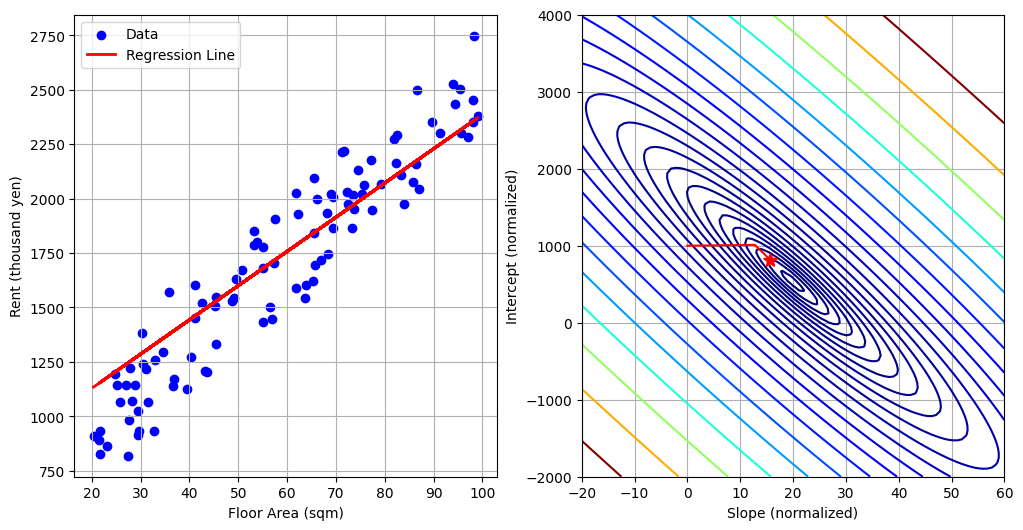

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from google.colab import drive
drive.mount('/content/drive')

# Generate synthetic data
np.random.seed(0)
n_data = 100
area = np.random.uniform(20, 100, n_data)  # Floor area (20 to 100 square meters)
rent = 500 + 20 * area + np.random.normal(0, 150, n_data)  # Rent, with increased variance

# Adam optimizer settings
learning_rate = 0.2  # Learning rate for Adam
beta1 = 0.9  # Decay rate for the first moment
beta2 = 0.999  # Decay rate for the second moment
epsilon = 1e-8  # Small value to prevent division by zero

# Initialize parameters
theta_0, theta_1 = 1000, 0  # Initial values
m_t0, m_t1 = 0, 0  # Initialize first moment vectors
v_t0, v_t1 = 0, 0  # Initialize second moment vectors

theta_history = [(theta_0, theta_1)]
cost_history = []

# Cost function definition
def compute_cost(theta_0, theta_1, X, y):
    m = len(y)
    predictions = theta_0 + theta_1 * X
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Adam optimization execution
n_iter = 2000
for t in range(1, n_iter + 1):
    predictions = theta_0 + theta_1 * area
    errors = predictions - rent

    # Compute gradients
    grad_theta_0 = np.sum(errors) / n_data
    grad_theta_1 = np.sum(errors * area) / n_data

    # Update biased first moment estimate
    m_t0 = beta1 * m_t0 + (1 - beta1) * grad_theta_0
    m_t1 = beta1 * m_t1 + (1 - beta1) * grad_theta_1

    # Update biased second raw moment estimate
    v_t0 = beta2 * v_t0 + (1 - beta2) * (grad_theta_0 ** 2)
    v_t1 = beta2 * v_t1 + (1 - beta2) * (grad_theta_1 ** 2)

    # Compute bias-corrected first moment estimate
    m_t0_hat = m_t0 / (1 - beta1 ** t)
    m_t1_hat = m_t1 / (1 - beta1 ** t)

    # Compute bias-corrected second raw moment estimate
    v_t0_hat = v_t0 / (1 - beta2 ** t)
    v_t1_hat = v_t1 / (1 - beta2 ** t)

    # Update parameters
    theta_0 -= learning_rate * m_t0_hat / (np.sqrt(v_t0_hat) + epsilon)
    theta_1 -= learning_rate * m_t1_hat / (np.sqrt(v_t1_hat) + epsilon)

    theta_history.append((theta_0, theta_1))
    cost_history.append(compute_cost(theta_0, theta_1, area, rent))

# Prepare data for contour plot
theta_0_vals = np.linspace(-2000, 4000, 100)  # Symmetric range around the optimal intercept
theta_1_vals = np.linspace(-20, 60, 100)  # Symmetric range around the optimal slope
J_vals = np.zeros((len(theta_0_vals), len(theta_1_vals)))

for i, t0 in enumerate(theta_0_vals):
    for j, t1 in enumerate(theta_1_vals):
        J_vals[i, j] = compute_cost(t0, t1, area, rent)

# Create the animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Data points and the fitting line
ax1.scatter(area, rent, color='blue', label='Data')
line, = ax1.plot([], [], color='red', linewidth=2, label='Regression Line')
ax1.set_xlabel('Floor Area (sqm)')
ax1.set_ylabel('Rent (thousand yen)')
ax1.legend()
ax1.grid(True)

# Right plot: Cost function contours and convergence
ax2.contour(theta_1_vals, theta_0_vals, J_vals, levels=np.logspace(3, 7, 30), cmap='jet')
ax2.set_xlim(-20, 60)
ax2.set_ylim(-2000, 4000)
ax2.set_xlabel('Slope (normalized)')
ax2.set_ylabel('Intercept (normalized)')
ax2.grid(True)
star, = ax2.plot([], [], 'r*', markersize=10)
path, = ax2.plot([], [], color='red')

# Animation update function
def update(i):
    theta_0, theta_1 = theta_history[i]
    line.set_data(area, theta_0 + theta_1 * area)
    star.set_data(theta_1, theta_0)
    path.set_data([th[1] for th in theta_history[:i+1]], [th[0] for th in theta_history[:i+1]])

# Create animation, skip frames for faster progression
ani = animation.FuncAnimation(fig, update, frames=range(0, n_iter, 4), repeat=False)

# Save the animation as a GIF
ani.save('/content/drive/MyDrive/Colab Notebooks/MachineLearning/gradient_descent_animation.gif', writer='imagemagick', fps=10)

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/MachineLearning/gradient_descent_animation.gif')

#### **ローカルミニマの問題**
勾配降下法の主な問題点の1つは、ローカルミニマ（局所最小値）に陥るリスクがあることです。私たちが求めているのはグローバルミニマ（全体の最小値）ですが、初期のスタート地点によってはローカルミニマに到達してしまうことがあります。この問題は、初期化を複数回行うことで解決できる場合があります。

### **結論**
勾配降下法は、多くの機械学習アルゴリズムや最適化問題で重要な役割を果たします。関数の最小値を探す問題で、この方法はそのシンプルさと有用性のために非常に広く使用されています。勾配降下法を成功させるためには、適切なステップサイズと初期値の設定が重要であり、これらの要素がアルゴリズムの収束速度と精度に大きな影響を与えます。

勾配降下法では、学習率は局所最適値に近づくためにどの程度の変化を行うかに影響します。正しい方向がわかれば、学習率はその方向にどれだけジャンプするかを表します。

これが、多くの自己啓発ガイドが小さな一歩を踏み出すことを勧める理由です。小さな一歩は学習率が小さいことを意味します。小さな一歩を踏み出すことで、努力が失敗する可能性が減ります。学習率が高すぎると、最適な解決策から逸脱してしまう可能性があります。基本的に、劇的な変化は最適な解決策から遠ざかる原因になります。それがどのように見えるかは、次の図をご覧ください。